In [1]:
import pandas as pd
import numpy as np

ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2022_MCD3735A/Módulo 6 - Discretización de variables/'
R=pd.read_csv(ruta+'Restaurante.csv')
R

,Alt,Bar,Vier,Ham,Clientes,Precio,Llov,Res,Tipo,Est,Esperar
0,Sí,No,No,Sí,Algunos,$$$,No,Sí,Francés,0-10,Sí
1,Sí,No,No,Sí,Lleno,$,No,No,Tailandés,30-60,No
2,No,Sí,No,No,Algunos,$,No,No,Hamburg.,0-10,Sí
3,Sí,No,Sí,Sí,Lleno,$,Sí,No,Tailandés,10-30,Sí
4,Sí,No,Sí,No,Lleno,$$$,No,Sí,Francés,>60,No
5,No,Sí,No,Sí,Algunos,$$,Sí,Sí,Italiano,0-10,Sí
6,No,Sí,No,No,Ninguno,$,Sí,No,Hamburg.,0-10,No
7,No,No,No,Sí,Algunos,$$,Sí,Sí,Tailandés,0-10,Sí
8,No,Sí,Sí,No,Lleno,$,Sí,No,Hamburg.,>60,No
9,Sí,Sí,Sí,Sí,Lleno,$$$,No,Sí,Italiano,10-30,No


In [ ]:
2/3*(1-2/3)

0.22222222222222224

# Clasificación por árboles de decisión

In [ ]:
# Codificación
R.replace('No',0,inplace=True)
R.replace('Sí',1,inplace=True)
R.drop(columns='Tipo',inplace=True)
R

,Alt,Bar,Vier,Ham,Clientes,Precio,Llov,Res,Est,Esperar
0,1,0,0,1,Algunos,$$$,0,1,0-10,1
1,1,0,0,1,Lleno,$,0,0,30-60,0
2,0,1,0,0,Algunos,$,0,0,0-10,1
3,1,0,1,1,Lleno,$,1,0,10-30,1
4,1,0,1,0,Lleno,$$$,0,1,>60,0
5,0,1,0,1,Algunos,$$,1,1,0-10,1
6,0,1,0,0,Ninguno,$,1,0,0-10,0
7,0,0,0,1,Algunos,$$,1,1,0-10,1
8,0,1,1,0,Lleno,$,1,0,>60,0
9,1,1,1,1,Lleno,$$$,0,1,10-30,0


In [ ]:
dC={'Ninguno':-1,'Algunos':0,'Lleno':1}
dP={'$':-1,'$$':0,'$$$':1}
dE={'0-10':-2,'10-30':-1,'30-60':0,'>60':3}
R['Clientes']=R['Clientes'].map(dC)
R['Precio']=R['Precio'].map(dP)
R['Est']=R['Est'].map(dE)
R

,Alt,Bar,Vier,Ham,Clientes,Precio,Llov,Res,Est,Esperar
0,1,0,0,1,0,1,0,1,-2,1
1,1,0,0,1,1,-1,0,0,0,0
2,0,1,0,0,0,-1,0,0,-2,1
3,1,0,1,1,1,-1,1,0,-1,1
4,1,0,1,0,1,1,0,1,3,0
5,0,1,0,1,0,0,1,1,-2,1
6,0,1,0,0,-1,-1,1,0,-2,0
7,0,0,0,1,0,0,1,1,-2,1
8,0,1,1,0,1,-1,1,0,3,0
9,1,1,1,1,1,1,0,1,-1,0


In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
DTC=DecisionTreeClassifier()
DTC.fit(R.drop(columns='Esperar'),R['Esperar'])

DecisionTreeClassifier()

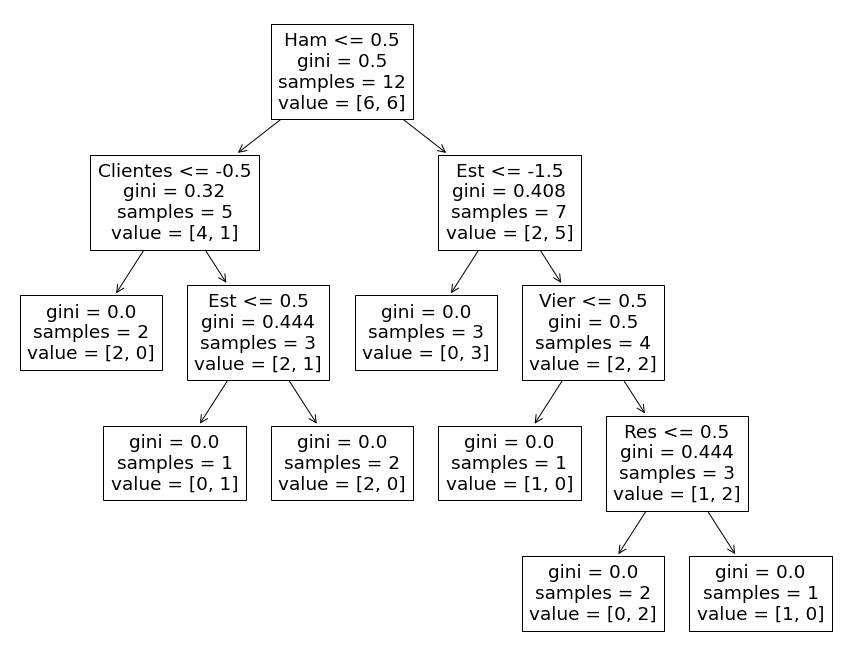

In [ ]:
plt.figure(figsize=(15,12))
T=plot_tree(DTC,feature_names=R.columns[:-1])

# Regresión para discretización

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [5]:
data=pd.read_csv(ruta+'dataKmeans.csv')
data.head(2)

,x,y
0,-1.905967,-0.780757
1,-2.934568,-0.955310


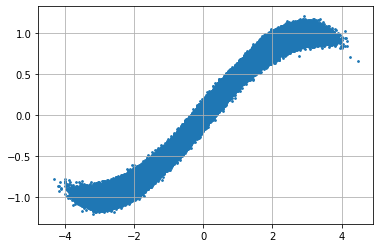

In [6]:
plt.scatter(data['x'],data['y'],s=3)
plt.grid()

In [9]:
DTR=DecisionTreeRegressor(max_depth=3)
X,x,Y,y=train_test_split(data[['x']],data['y'],test_size=0.4)
DTR.fit(X,Y)
data['tree']=DTR.predict(data[['x']])
data.head()

,x,y,tree
0,-1.905967,-0.780757,-0.901056
1,-2.934568,-0.955310,-0.901056
2,-2.178603,-0.960997,-0.901056
3,-1.870977,-0.791746,-0.901056
4,-2.513686,-0.968655,-0.901056


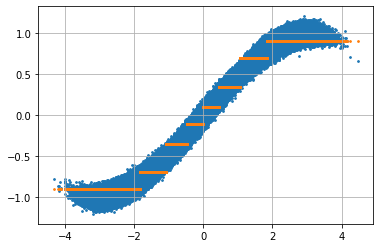

In [10]:
plt.scatter(data['x'],data['y'],s=3)
plt.scatter(data['x'],data['tree'],s=3)
plt.grid()

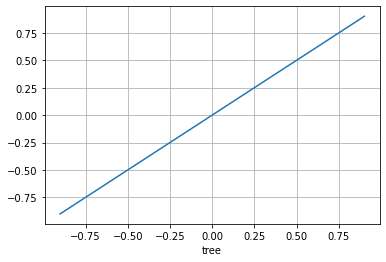

In [11]:
data.groupby('tree')['y'].mean().plot(grid=True)

# Regresión lineal para árboles de decisión

In [12]:
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize_scalar

In [14]:
minimize_scalar?

In [15]:
def obj(s,X,Y):
  def dist(a,b):
    return np.linalg.norm(a-b)
  # Partición binaria
  y1=Y[X<s]
  x1=X[X<s].reshape(-1,1)
  y2=Y[X>=s]
  x2=X[X>=s].reshape(-1,1)

  # Entrenamiento del modelo lineal
  lin=LinearRegression()
  lin.fit(x1,y1)
  y1e=lin.predict(x1)
  lin.fit(x2,y2)
  y2e=lin.predict(x2)
  return dist(y1,y1e)+dist(y2,y2e)

In [17]:
X=data['x'].values
Y=data['y'].values
sol=minimize_scalar(obj,bounds=(min(X),max(X)),args=(X,Y),method='Bounded')
sol

     fun: 104.97956058479545
 message: 'Solution found.'
    nfev: 28
  status: 0
 success: True
       x: 2.91955541738683

In [18]:
s1=sol.x
s1

2.91955541738683

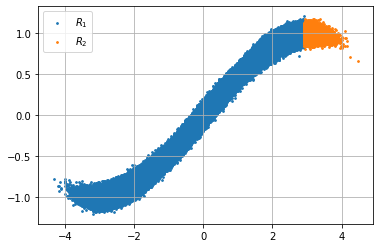

In [19]:
# Encontramos los contenedores resultantes
X1=X[X<s1]
Y1=Y[X<s1]
X2=X[X>=s1]
Y2=Y[X>=s1]
plt.scatter(X1,Y1,s=3,label='$R_1$')
plt.scatter(X2,Y2,s=3,label='$R_2$')
plt.legend()
plt.grid()

In [20]:
sol2=minimize_scalar(obj,bounds=(min(X1),max(X1)),args=(X1,Y1),method='Bounded')
sol2

     fun: 97.77020321467181
 message: 'Solution found.'
    nfev: 24
  status: 0
 success: True
       x: -2.7167408453625854

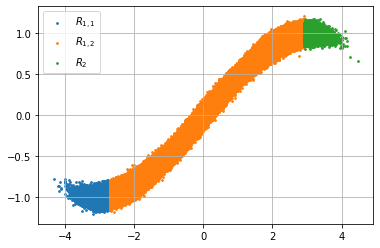

In [21]:
s2=sol2.x
X11=X1[X1<s2]
Y11=Y1[X1<s2]
X12=X1[X1>=s2]
Y12=Y1[X1>=s2]
plt.scatter(X11,Y11,s=3,label='$R_{1,1}$')
plt.scatter(X12,Y12,s=3,label='$R_{1,2}$')
plt.scatter(X2,Y2,s=3,label='$R_2$')
plt.legend()
plt.grid()